In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdr as pdr
import PyMieScatt as ps
import planetary
from planetary import planetRad

# Part II: Topography Analysis - Hurst Exponent Calculation

In [3]:
data1 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data1 (1).txt", delim_whitespace=True, header=None)
data2 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data2 (1).txt", delim_whitespace=True, header=None)

C:\Users\Mirie\AppData\Local\Temp\ipykernel_14352\257674426.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data1 (1).txt", delim_whitespace=True, header=None)
C:\Users\Mirie\AppData\Local\Temp\ipykernel_14352\257674426.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data2 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data2 (1).txt", delim_whitespace=True, header=None)


In [4]:
data1.columns = ['H', 'V']
data2.columns = ['H', 'V']

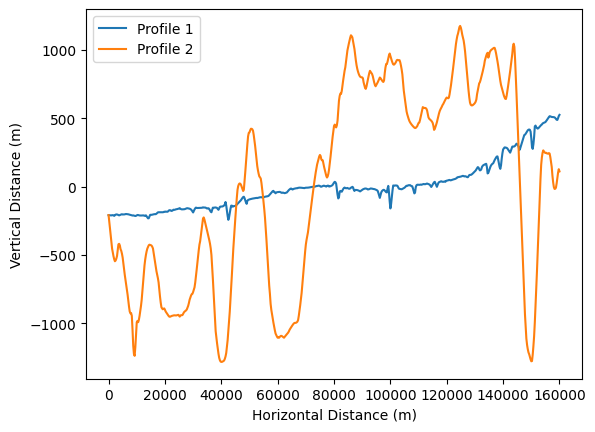

In [5]:
plt.plot(data1['H'], data1['V'], label = 'Profile 1')
plt.plot(data2['H'], data2['V'], label = 'Profile 2')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()

### 1. Find RMS slopes

In [6]:
#used microsoft copilot to help with creating this function, as well as help from Rhali :-)
def calculate_rms_slope(data, L):
    elevation = np.asarray([np.mean(data['V'][i*L:((i+1)*L)]) for i in range(len(data['V'])//L)])
    return np.std((elevation[1:]-elevation[:-1])/L)


In [7]:
#find slopes

#s_0 = rms slope on the first spacial scale 
#s(L) = rms slope on the larger spacial scale

L_1 = 1
L_2 = 10
baselines = np.array([L_1,L_2])

In [8]:
rms_slope_1 = []
rms_slope_2 = []
for L in baselines:
    slope_1= calculate_rms_slope(data1, L)
    slope_2 = calculate_rms_slope(data2, L)
    rms_slope_1.append(slope_1)
    rms_slope_2.append(slope_2)

### 2. Plot RMS slopes as a function of L

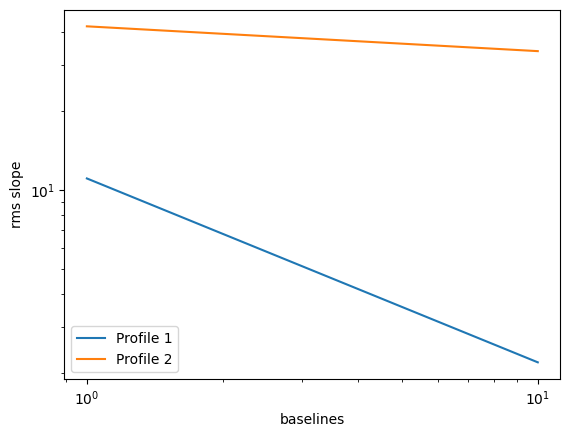

In [9]:
plt.plot(baselines, rms_slope_1, label = 'Profile 1') #color = 'blue')
plt.plot(baselines, rms_slope_2, label = 'Profile 2') #color = 'blue')
plt.ylabel('rms slope')
plt.xlabel('baselines')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### 3. Determine Hurst Exponent

In [10]:
def calculate_Hurst(s_0, s_L):
    return np.log10(s_L/s_0)+1 

In [11]:
H_1 = calculate_Hurst(rms_slope_1[0], rms_slope_1[-1])
H_2 = calculate_Hurst(rms_slope_2[0], rms_slope_2[-1])

In [13]:
print("Hurst exponent for profile 1: %f" %H_1)
print("Hurst exponent for profile 2: %f" %H_2)

Hurst exponent for profile 1: 0.297837
Hurst exponent for profile 2: 0.905248


### 4. Identifying the profiles

From Rosenburg et al (2011): "The Hurst exponent is high within the lunar 
highlands, with a median value of 0.95, and lower in the maria (with a median value
of 0.76)"
\
Given the quote above, I'd say that profile 2 best represents the lunar highlands, and profile 1 represents the maria. 

According to this paper: https://www.researchgate.net/publication/277680229_Hurst_exponent_for_fractal_characterization_of_LANDSAT_images \
"According to the presented results, the value of the Hurst exponent is directly relatedto the changes in land use, 
showing a decreasing value when the area under study has been modiﬁed by natural processes or human intervention" \
This means that, since the maria has a lower Hurst exponent, the terrain has been modified more recently/frequenty than the highlands. This is most likely because of lava flows that recycle the crust.


# Part III: Mercury Crater Analysis using PDS Data

## Data Acquisition

In [15]:
img = pdr.read(r"C:\Users\Mirie\Downloads\MDIS_HIW_256PPD_H09NE2.IMG")
lbl = pdr.read(r"C:\Users\Mirie\Downloads\MDIS_HIW_256PPD_H09NE2.LBL")

In [16]:
np.shape(img['IMAGE'])

(6, 5760, 9216)

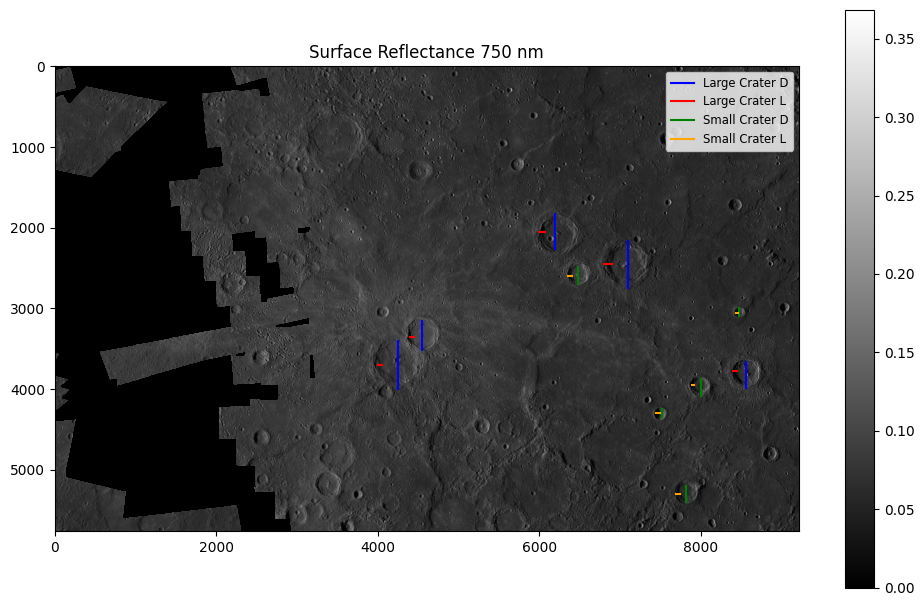

In [17]:
plt.figure(figsize = [12, 12/1.6])
plt.imshow(img['IMAGE'][0,:,:], 'gist_gray',vmin=0)
plt.colorbar()
plt.title('Surface Reflectance 750 nm')

#Crater 1
plt.axvline(4250, 1-(3400/5760), 1-(4000/5760),label = 'Large Crater D', color = 'blue')
plt.axhline(3700, 4000/9216, 4050/9216, label = 'Large Crater L', color = 'red')

#Crater 2
plt.axvline(4550, 1-(3150/5760), 1-(3510/5760), color = 'blue')
plt.axhline(3350, 4400/9216, 4450/9216,  color = 'red')

#Crater 3
plt.axvline(6200, 1-(1825/5760), 1-(2260/5760), color = 'blue')
plt.axhline(2050, 6000/9216, 6070/9216, color = 'red')

#Crater 4
plt.axvline(7100, 1-(2160/5760), 1-(2745/5760), color = 'blue')
plt.axhline(2450, 6800/9216, 6900/9216, color = 'red')

#Crater 5
plt.axvline(8560, 1-(3660/5760), 1-(3980/5760), color = 'blue')
plt.axhline(3780, 8400/9216, 8450/9216, color = 'red')

#Crater 6
plt.axvline(8000, 1-(3870/5760), 1-(4080/5760),label = 'Small Crater D', color = 'Green')
plt.axhline(3950, 7890/9216, 7920/9216, label = 'Small Crater L', color = 'orange')

#Crater 7
plt.axvline(6475, 1-(2490/5760), 1-(2700/5760), color = 'Green')
plt.axhline(2600, 6360/9216, 6400/9216, color = 'orange')

#Crater 8
plt.axvline(7820, 1-(5200/5760), 1-(5400/5760), color = 'Green')
plt.axhline(5300, 7700/9216, 7750/9216, color = 'orange')

#Crater 9
plt.axvline(7520, 1-(4240/5760), 1-(4350/5760), color = 'Green')
plt.axhline(4300, 7450/9216, 7500/9216, color = 'orange')

#Crater 10
plt.axvline(8480, 1-(2990/5760), 1-(3090/5760), color = 'Green')
plt.axhline(3050, 8440/9216, 8460/9216, color = 'orange')

plt.legend(fontsize = 'small')
plt.show()

In [18]:
lbl['LABEL']

'PDS_VERSION_ID                 = PDS3\nRECORD_TYPE                    = FIXED_LENGTH\nRECORD_BYTES                   = 36864\nFILE_RECORDS                   = 34560\n\n^IMAGE                         = "MDIS_HIW_256PPD_H09NE2.IMG"\n\n/* Map-projected Basemap RDR Identification */\n\nDATA_SET_ID                    = "MESS-H-MDIS-5-RDR-HIW-V1.0"\nPRODUCT_ID                     = "MDIS_HIW_256PPD_H09NE2"\n\nINSTRUMENT_HOST_NAME           = "MESSENGER"\nINSTRUMENT_NAME = {"MERCURY DUAL IMAGING SYSTEM NARROW ANGLE CAMERA",\n                   "MERCURY DUAL IMAGING SYSTEM WIDE ANGLE CAMERA"}\nINSTRUMENT_ID                  = {"MDIS-NAC","MDIS-WAC"}\nTARGET_NAME                    = MERCURY\nPRODUCT_TYPE                   = MAP_PROJECTED_HIW\nPRODUCT_CREATION_TIME          = 2016-12-31T06:18:00.044\nSTART_TIME                     = "N/A"\nSTOP_TIME                      = "N/A"\nSPACECRAFT_CLOCK_START_COUNT   = "N/A"\nSPACECRAFT_CLOCK_STOP_COUNT    = "N/A"\nPRODUCT_VERSION_ID             = "2"

$\textbf{Product \ ID:}$ "MDIS_HIW_256PPD_H09NE2" \
$\textbf{Acquisition \ date}$: 2016-12-31T06:18:00.044 \
$\textbf{Observation \ geometry \ (including \ incidence \ angle):}$  \
$\textbf{Spatial \ resolution \ (m/pixel)}$: 166.310788 \
$\textbf{Approximate \ location \ on \ Mercury:}$ latitude: 0 - 22.5 degrees, longitude: 108 - 144 degrees

## Shadow Measurement and Depth Calculation

#### Assuming the side of the crater can be represented by a right triangle, we can find the shadow depth using the equation: $d = L tan \theta $  where L is the shadow length and $\theta$ is the solar incidence angle 

In [19]:
def calculate_depth(L, theta):
    return (L * np.tan(theta)) 

In [20]:
pixel_scale = 166.3 #meters/pixel from the label file

# The lines I plotted on top of the craters were used to measure the approximate crater diameters and shadow lengths below
crater_diameters = (pixel_scale * 10e-3) * np.array([600, 360, 435, 585, 320, 210, 210, 200, 110, 100]) #km
crater_shadows = (pixel_scale * 10e-3)  * np.array([50, 50, 70, 100, 50, 30, 40, 50, 50, 20]) #km


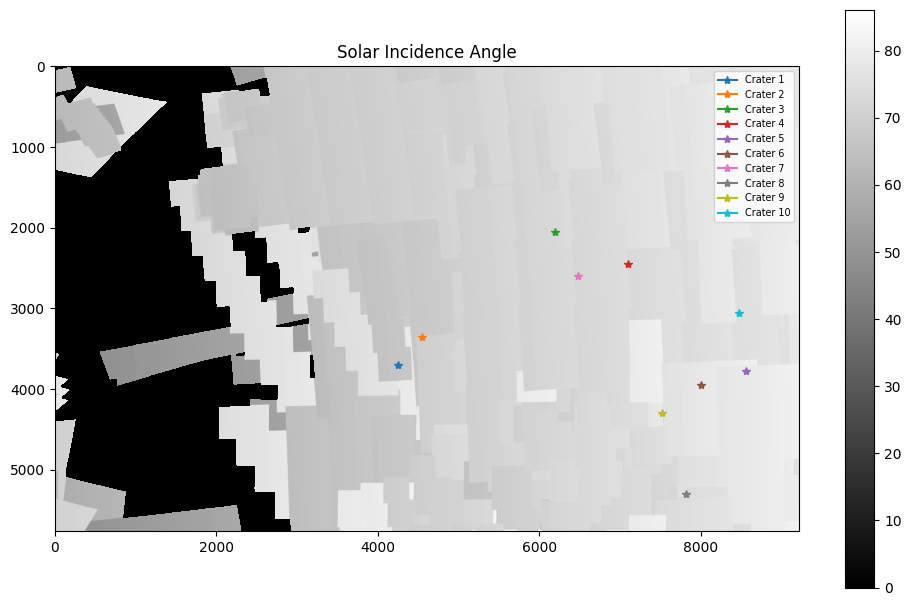

In [21]:
plt.figure(figsize = [12, 12/1.6])
plt.imshow(img['IMAGE'][3,:,:], 'gist_gray',vmin=0)
plt.colorbar()
plt.title('Solar Incidence Angle')

crater_coords = [[4250, 3700],[4550,3350],[6200, 2050], [7100,2450],[8560,3780], [8000, 3950],
                 [6475,2600], [7820,5300], [7520,4300], [8480,3050] ]
theta_arr = []
crater_num = []
for i in range(len(crater_coords)):
    plt.plot(crater_coords[i][0], crater_coords[i][1], marker = '*', label = 'Crater %s' %(i+1))
    theta_arr.append(img['IMAGE'][3,crater_coords[i][1],crater_coords[i][0]])
    crater_num.append('Crater %s' %(i+1))
plt.legend(fontsize = 'x-small')
plt.show()

In [22]:
# Calculating crater depths
crater_depths = []
for L, theta in zip(crater_shadows, theta_arr):
    theta = (theta*np.pi/180)
    d = calculate_depth(L, theta)
    crater_depths.append(d)

In [23]:
# Calculating depth-to-diameter ratio
d_D = crater_depths/crater_diameters

In [24]:
df = pd.DataFrame()

In [25]:
df['Crater Number'] = crater_num
df['Crater Diameter (km)'] = crater_diameters 
df['Crater Shadow Length (km)'] = crater_shadows
df['Crater Solar Incidence Angle (degrees)'] = theta_arr
df['Crater Depth (km)'] = crater_depths
df['Crater d/D ratio'] = d_D

In [26]:
df

,Crater Number,Crater Diameter (km),Crater Shadow Length (km),Crater Solar Incidence Angle (degrees),Crater Depth (km),Crater d/D ratio
0,Crater 1,997.800,83.15,66.655350,192.658725,0.193084
1,Crater 2,598.680,83.15,69.940834,227.720803,0.380371
2,Crater 3,723.405,116.41,73.013634,381.084255,0.526792
3,Crater 4,972.855,166.30,73.151344,549.126427,0.564448
4,Crater 5,532.160,83.15,78.508919,409.021193,0.768606
5,Crater 6,349.230,49.89,77.938499,233.481389,0.668561
6,Crater 7,349.230,66.52,72.319336,208.677822,0.597537
7,Crater 8,332.600,83.15,73.833122,286.822968,0.862366
8,Crater 9,182.930,83.15,73.826340,286.696056,1.567245
9,Crater 10,166.300,33.26,75.064209,124.686767,0.749770


## Analysis

In [27]:
mean_d_D_large = np.mean(d_D[0:4])
print('Mean d/D ratio for large craters is: %f' %mean_d_D_large)
mean_d_D_small = np.mean(d_D[5:9])
print('Mean d/D ratio for small craters is: %f' %mean_d_D_small)

std_d_D_large = np.std(d_D[0:4])
print('std of the d/D ratio for large craters is: %f' %std_d_D_large)
std_d_D_small = np.std(d_D[5:9])
print('std of the d/D ratio for small craters is: %f' %std_d_D_small)

Mean d/D ratio for large craters is: 0.416174
Mean d/D ratio for small craters is: 0.923927
std of the d/D ratio for large craters is: 0.146008
std of the d/D ratio for small craters is: 0.383859


Based on this article: https://www.sciencedirect.com/science/article/pii/S001910351600035X#sec0015 \
My crater diameters are significantly larger, and I think I don't have enough craters to compare to the statistics in this paper. \
However, overall, my results and the paper both show that crater depth generally increases with crater diameter

# Part IV: Spectroscopy - Mie Scattering Analysis

## Optical Constants

### 1. Download optical constants (n and k values) for an ice of your choice

In [28]:
spectra_ch4 = pd.read_csv(r"C:\Users\Mirie\Downloads\CH4-Amorphous-10K.txt", delim_whitespace=True, header=None)
spectra_ch4.columns = [ 'wavelength(nm)', 'Transmission' , 'n'  , 'k']

wavelength = np.array(spectra_ch4['wavelength(nm)'])
transmission = np.array(spectra_ch4['Transmission'])
n_arr = np.array(spectra_ch4['n'])
k_arr = np.array(spectra_ch4['k'])

C:\Users\Mirie\AppData\Local\Temp\ipykernel_14352\419012752.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  spectra_ch4 = pd.read_csv(r"C:\Users\Mirie\Downloads\CH4-Amorphous-10K.txt", delim_whitespace=True, header=None)


In [29]:
spectra_ch4

,wavelength(nm),Transmission,n,k
0,399.98999,0.990508,1.337587,0.032845
1,400.08999,0.991263,1.337587,0.030416
2,400.18999,0.991659,1.340041,0.028832
3,400.28999,0.991410,1.335972,0.029694
4,400.38999,0.990378,1.338063,0.033255
...,...,...,...,...
45996,4999.60000,0.999921,1.278251,0.000075
45997,4999.70000,0.999816,1.278234,0.000107
45998,4999.80000,0.999756,1.278185,0.000127
45999,4999.90000,0.999759,1.278157,0.000127


### 2. Plot the real (n) and imaginary (k) parts of the refractive index as a function of wavelength

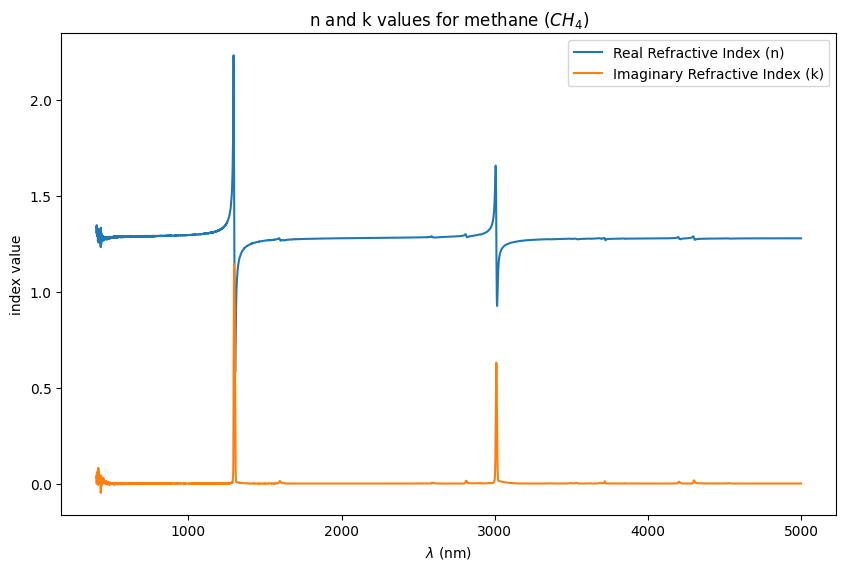

In [32]:
plt.figure(figsize = [10, 10/1.6])
plt.plot(wavelength, n_arr, label = 'Real Refractive Index (n)')
plt.plot(wavelength, k_arr, label = 'Imaginary Refractive Index (k)')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('index value')
plt.title('n and k values for methane ($CH_{4}$)')
plt.legend()

### 3. Identify the major absorption bands and explain their physical origin

These two peaks in the refractive index correspond to strong aborption bands for methane at roughly 3000 and 1300 nm. This strong absoprtion in the infrared is due to the vibrational modes of the methane C-H bond

## Mie Parameter Calculations

In [34]:
def column(matrix, i):
    return [row[i] for row in matrix]

### 1. Calculate Mie parameters 

In [35]:
diameter_ch4 = [1000, 10000, 100000] #nm
m_arr = n_arr[0:29999] + 1j*k_arr[0:29999]
mie_params_1 = []
mie_params_10 = []
mie_params_100 = []
i = 0
while i < len(m_arr):
#for i in range(len(m_arr)):
    Qext_1,Qsca_1,Qabs_1,g_1,Qpr,Qback,Qratio= ps.AutoMieQ(m_arr[i],wavelength[i],diameter_ch4[0])
    ssa_1 = Qsca_1/Qext_1 # calculating single-scattering albedo from Qext and Qsca
    mie_params_1.append([Qext_1,Qsca_1,Qabs_1,g_1,ssa_1])

    Qext_10,Qsca_10,Qabs_10,g_10,Qpr,Qback,Qratio= ps.AutoMieQ(m_arr[i],wavelength[i],diameter_ch4[1])
    ssa_10 = Qsca_10/Qext_10
    mie_params_10.append([Qext_10,Qsca_10,Qabs_10,g_10,ssa_10])

    Qext_100,Qsca_100,Qabs_100,g_100,Qpr,Qback,Qratio= ps.AutoMieQ(m_arr[i],wavelength[i],diameter_ch4[2])
    ssa_100 = Qsca_100/Qext_100
    mie_params_100.append([Qext_100,Qsca_100,Qabs_100,g_100,ssa_100])

    i+=1

In [36]:
Qext_1_arr = column(mie_params_1,0)
Qsca_1_arr = column(mie_params_1,1)
Qabs_1_arr = column(mie_params_1,2)
g_1_arr = column(mie_params_1,3)
ssa_1_arr = column(mie_params_1,4)

Qext_10_arr = column(mie_params_10,0)
Qsca_10_arr = column(mie_params_10,1)
Qabs_10_arr = column(mie_params_10,2)
g_10_arr = column(mie_params_10,3)
ssa_10_arr = column(mie_params_10,4)

Qext_100_arr = column(mie_params_100,0)
Qsca_100_arr = column(mie_params_100,1)
Qabs_100_arr = column(mie_params_100,2)
g_100_arr = column(mie_params_100,3)
ssa_100_arr = column(mie_params_100,4)

### 2. Plot Mie Parameters

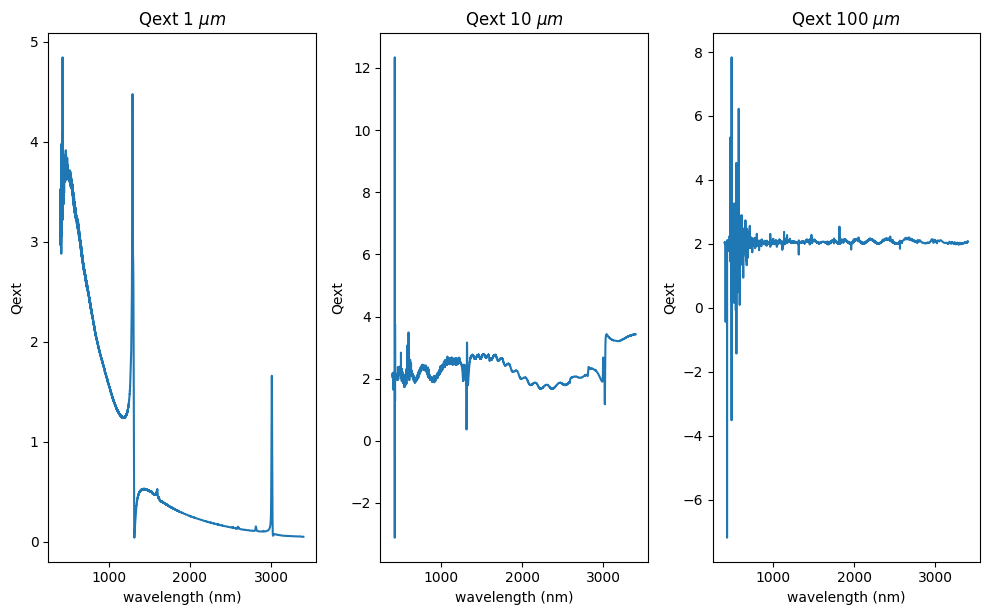

In [60]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=[10,10/1.6])
ax1.plot(wavelength[0:29999], Qext_1_arr)
ax1.set_title('Qext 1 $\mu m$')
ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('Qext')
ax2.plot(wavelength[0:29999], Qext_10_arr)
ax2.set_title('Qext 10 $\mu m$')
ax2.set_xlabel('wavelength (nm)')
ax2.set_ylabel('Qext')
ax3.plot(wavelength[0:29999], Qext_100_arr)
ax3.set_title('Qext 100 $\mu m$')
ax3.set_xlabel('wavelength (nm)')
ax3.set_ylabel('Qext')
plt.tight_layout()

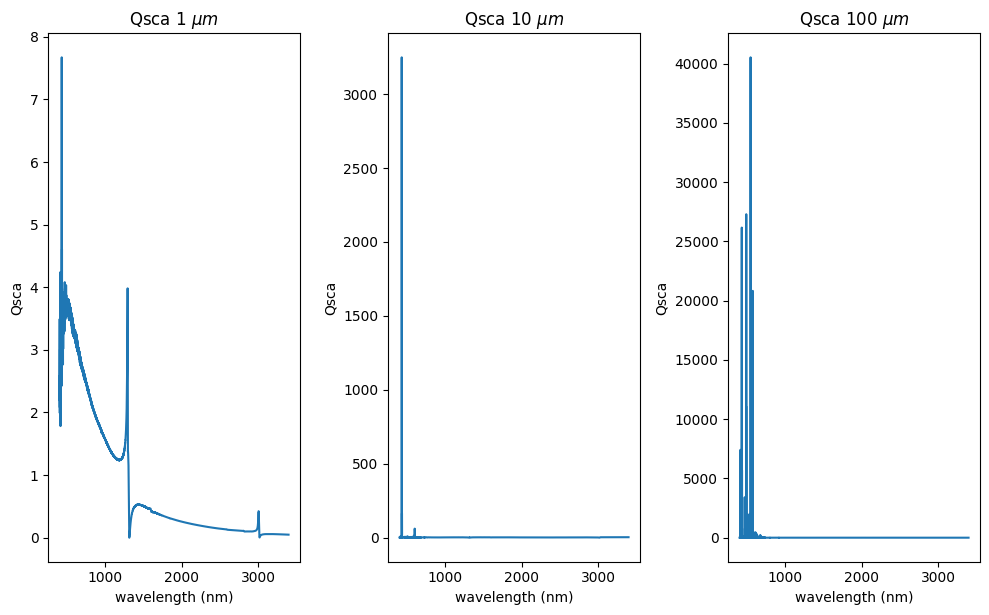

In [61]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=[10,10/1.6])
ax1.plot(wavelength[0:29999], Qsca_1_arr)
ax1.set_title('Qsca 1 $\mu m$')
ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('Qsca')
ax2.plot(wavelength[0:29999], Qsca_10_arr)
ax2.set_title('Qsca 10 $\mu m$')
ax2.set_xlabel('wavelength (nm)')
ax2.set_ylabel('Qsca')
ax3.plot(wavelength[0:29999], Qsca_100_arr)
ax3.set_title('Qsca 100 $\mu m$')
ax3.set_xlabel('wavelength (nm)')
ax3.set_ylabel('Qsca')
plt.tight_layout()

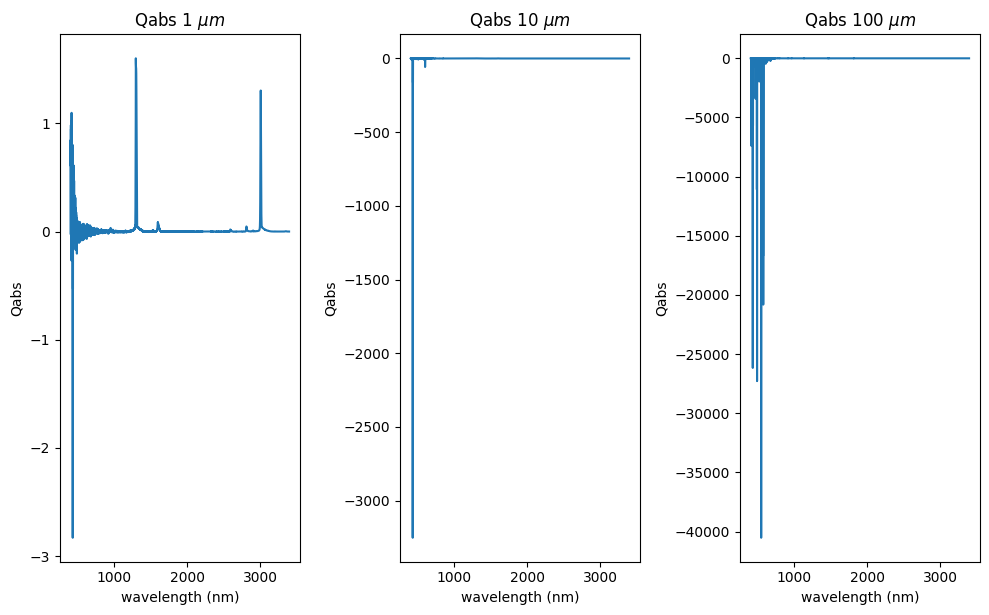

In [62]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=[10,10/1.6])
ax1.plot(wavelength[0:29999], Qabs_1_arr)
ax1.set_title('Qabs 1 $\mu m$')
ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('Qabs')
ax2.plot(wavelength[0:29999], Qabs_10_arr)
ax2.set_title('Qabs 10 $\mu m$')
ax2.set_xlabel('wavelength (nm)')
ax2.set_ylabel('Qabs')
ax3.plot(wavelength[0:29999], Qabs_100_arr)
ax3.set_title('Qabs 100 $\mu m$')
ax3.set_xlabel('wavelength (nm)')
ax3.set_ylabel('Qabs')
plt.tight_layout()

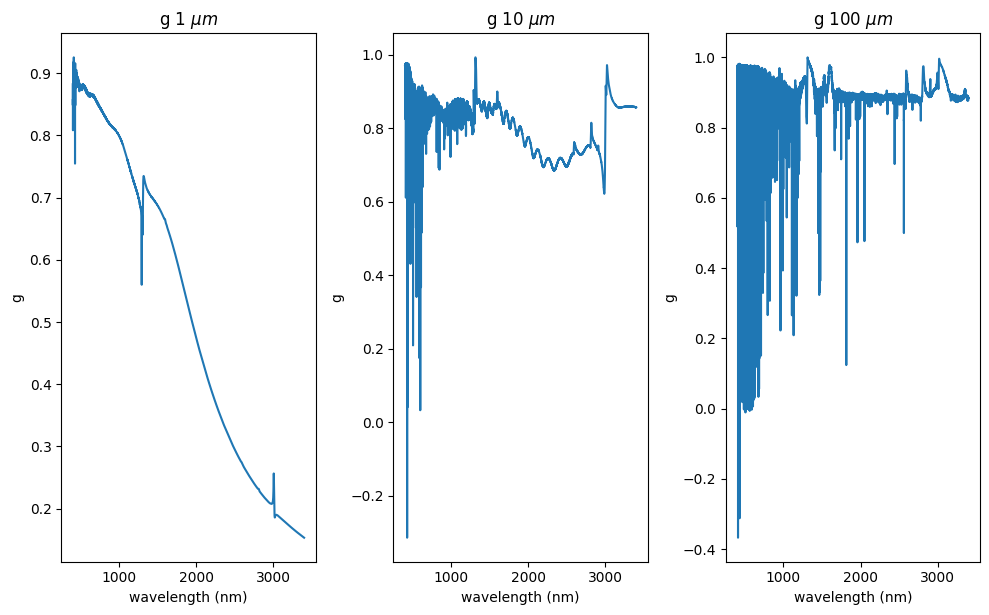

In [63]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=[10,10/1.6])
ax1.plot(wavelength[0:29999], g_1_arr)
ax1.set_title('g 1 $\mu m$')
ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('g')
ax2.plot(wavelength[0:29999], g_10_arr)
ax2.set_title('g 10 $\mu m$')
ax2.set_xlabel('wavelength (nm)')
ax2.set_ylabel('g')
ax3.plot(wavelength[0:29999], g_100_arr)
ax3.set_title('g 100 $\mu m$')
ax3.set_xlabel('wavelength (nm)')
ax3.set_ylabel('g')
plt.tight_layout()

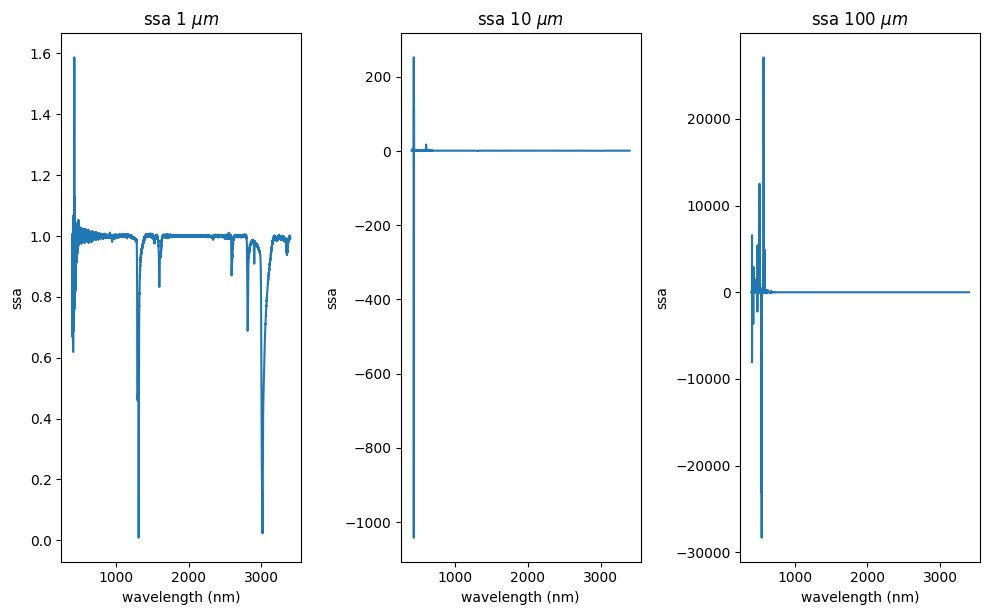

In [64]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=[10,10/1.6])
ax1.plot(wavelength[0:29999], ssa_1_arr)
ax1.set_title('ssa 1 $\mu m$')
ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('ssa')
ax2.plot(wavelength[0:29999], ssa_10_arr)
ax2.set_title('ssa 10 $\mu m$')
ax2.set_xlabel('wavelength (nm)')
ax2.set_ylabel('ssa')
ax3.plot(wavelength[0:29999], ssa_100_arr)
ax3.set_title('ssa 100 $\mu m$')
ax3.set_xlabel('wavelength (nm)')
ax3.set_ylabel('ssa')
plt.tight_layout()

### 3. Discussion

The 1300 and 3000 nm absorpbance features seem to somewhat disappear in the 10 micron and 100 micron diameter runs. However, in the 1 micron run, you can clearly see these features appear in all 5 mie parameters.

## Reflectance Spectra

### 2. Generate synthetic reflectance spectra

In [66]:
# I'm referencing Pluto for geometric albedo because I'm looking at methane
geometric_albedo = 0.52
tau = 1e6
mu = np.cos(np.pi/4) #45 degrees incidence angle

In [67]:
albedo_1 = []
albedo_10 = []
albedo_100 = []
for j in range(len(ssa_1_arr)):
    a_1 = planetRad.albedo_layer_twostream(tau, ssa_1_arr[j], g_1_arr[j], mu, geometric_albedo)
    albedo_1.append(a_1)
    a_10 = planetRad.albedo_layer_twostream(tau, ssa_10_arr[j], g_10_arr[j], mu, geometric_albedo)
    albedo_10.append(a_10)
    a_100 = planetRad.albedo_layer_twostream(tau, ssa_100_arr[j], g_100_arr[j], mu, geometric_albedo)
    albedo_100.append(a_100)

C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\planetary\planetRad.py:186: RuntimeWarning: invalid value encountered in sqrt
  x = np.sqrt(3*ap*(1-w0p))
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\planetary\planetRad.py:199: RuntimeWarning: invalid value encountered in scalar multiply
  albedo = (1/q) * ( 2*( p*(1-gamma + w0p*bp) + w0p*(1+bp)*(gamma*x*mu - p)/(1 - (x*mu)**2))  \
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in albedo_layer_twostream (vectorized)
  outputs = ufunc(*inputs)
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\planetary\planetRad.py:199: RuntimeWarning: invalid value encountered in scalar add
  albedo = (1/q) * ( 2*( p*(1-gamma + w0p*bp) + w0p*(1+bp)*(gamma*x*mu - p)/(1 - (x*mu)**2))  \


Text(0.5, 1.0, 'Reflectance 1 micron diameter')

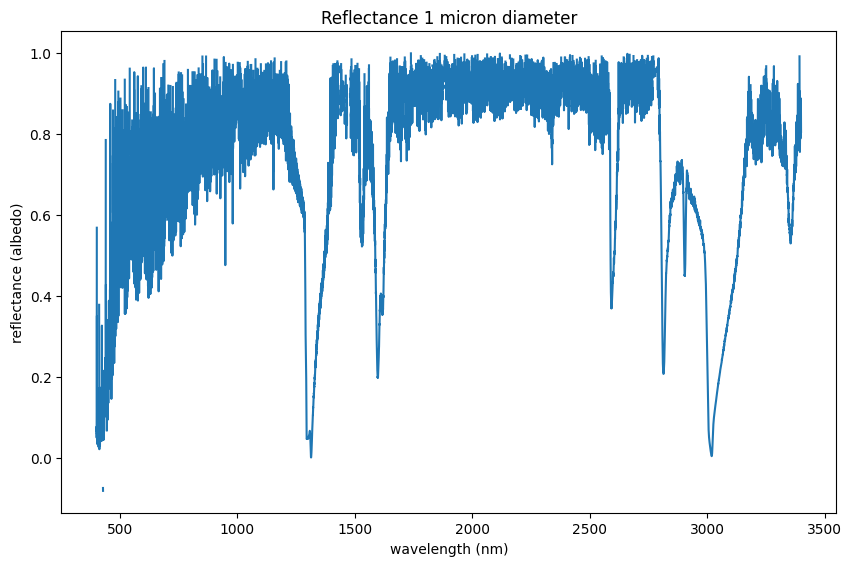

In [73]:
plt.figure(figsize = [10, 10/1.6])
plt.plot(wavelength[0:29999],albedo_1)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance (albedo)')
plt.title('Reflectance 1 micron diameter')

Text(0.5, 1.0, 'Reflectance 10 microns diameter')

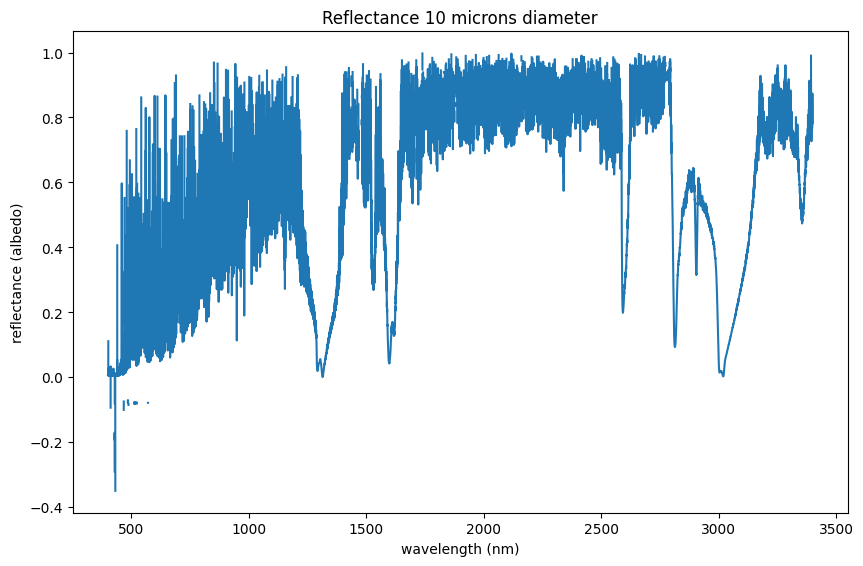

In [72]:
plt.figure(figsize = [10, 10/1.6])
plt.plot(wavelength[0:29999],albedo_10)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance (albedo)')
plt.title('Reflectance 10 microns diameter')

Text(0.5, 1.0, 'Reflectance 100 microns diameter')

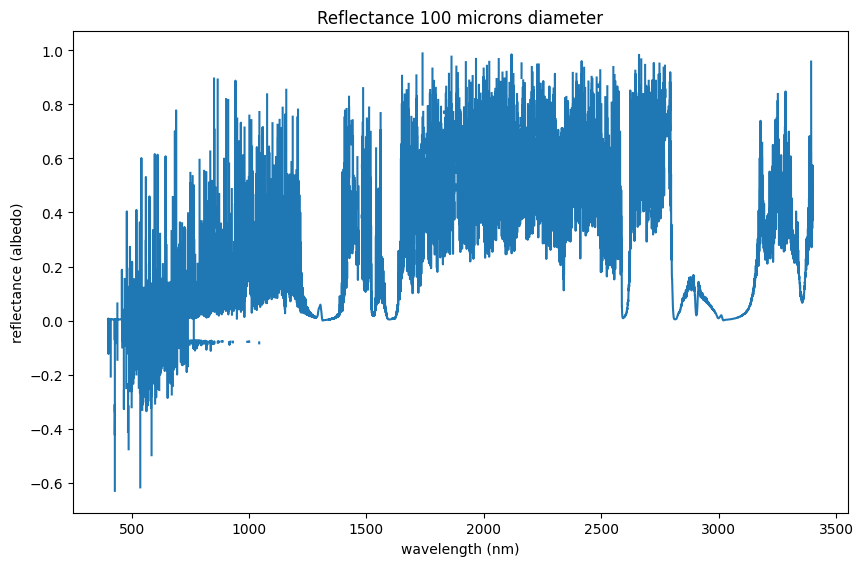

In [74]:
plt.figure(figsize = [10, 10/1.6])
plt.plot(wavelength[0:29999],albedo_100)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance (albedo)')
plt.title('Reflectance 100 microns diameter')

### 3. Analyze how the key spectral features (band depths, continuum slopes) change with particle size

As the particle diameter increases, the 1300 and 3000 nm absorption features start to decrease/disappear, and the continuum slope increases. This is because, as the particle size increases, there's more light that is reflected/scattered by the material. \
Like the example from class, where the deeper layers of an ice sheet/glacier appear more blue, because those layers are more compact (smaller particle size) so they absorb more light than the newer layers (less compact, bigger particle size). \
Also, as the size of the particles increases, we move from a rayleigh scattering to mie scattering regime. As we move into the mie scattering regime, the scattering effect increases, causing an increase in reflectance, which we see in the results above.

### 4 and 5. Search the literature and compare

Text(0.5, 1.0, 'Reflectance 1 micron diameter')

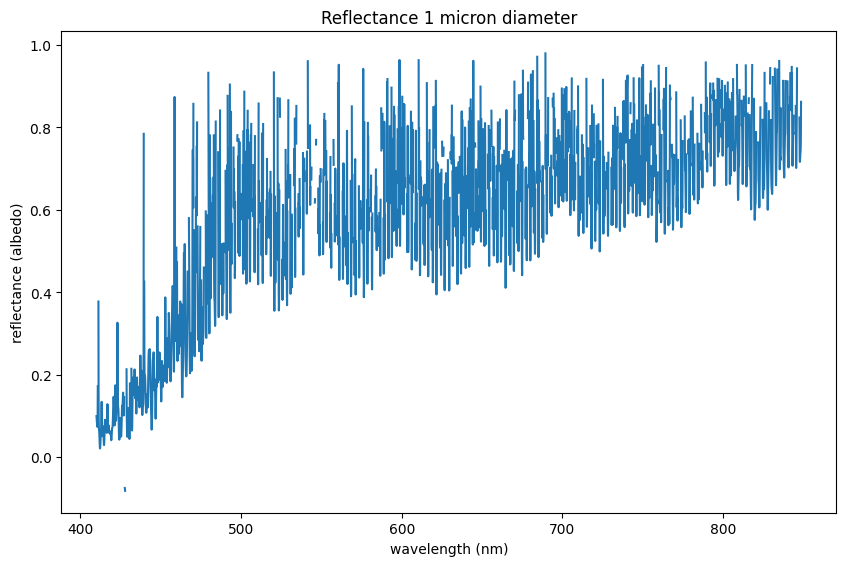

In [80]:
plt.figure(figsize = [10, 10/1.6])
plt.plot(wavelength[100:4500],albedo_1[100:4500])
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance (albedo)')
plt.title('Reflectance 1 micron diameter')

Referencing this paper: https://articles.adsabs.harvard.edu/pdf/1983ApJ...270..342A \
Plotting my results for 1 micron particles in a similar wavelength range used in the paper above, my results don't seem to be *too* far off from what I see in figure 4, 6 and 7, except their spectra seem to have a larger overall continuum slope. I'd say the 1 micron particle size best fits the description, however, the 10 micron size is somewhat comparable as well.